# <center>Data Visualisation ON IPL MATCHES Using Python </center>                                       

### <div style="text-align: right"> By Vinod Kumar Reddy Salkuti </div>

### Installing and Importing relavant Packages

In [2]:
#!pip install pandas_profiling
import numpy as np
np.set_printoptions(precision=4)
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading IPL Matches Dataset

In [3]:
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### First insights of dataset using info() and Describe()

In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [5]:
df_matches.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2017-05-14,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


##### Extracting basic information using pandas profiling package and saving it to a html file.

In [6]:
df_pre = df_matches.profile_report(title = 'IPL Matches Data Pandas Profiling before data preprocessing',style={'full_width':True})

In [7]:
df_pre.to_file(output_file="IPLmatches_pre_profiling.html")

##### From the report we get from pandas profiling , we observe the insights of data , its missing values,warning which need to be concentrated and basic visualisation and understanding on each column in dataset.

#### Let's do some data cleaning to make the dataset more meaning ful.

##### Extract unique values in each column and see if any team name is represented in different ways.

In [9]:
df_matches['team1'].unique()
df_matches['team2'].unique()
df_matches['toss_winner'].unique()
df_matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

##### From the above,we observe that "Rising Pune Supergiant" name is enter in two different ways, Hence rename to make it one single name.Replacing "Rising Pune Supergiant" with "Rising Pune Supergiants"

In [10]:
df_matches['winner']=df_matches['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team1']=df_matches['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['team2']=df_matches['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_matches['toss_winner']=df_matches['toss_winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

df_matches['team1'].unique()
df_matches['team2'].unique()
df_matches['toss_winner'].unique()
df_matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan], dtype=object)

#### Lets cocentrate on Missing values in Each columns and see if we can clean them

##### City column has seven missing values.From above pandas profiling result,we see that Mumbai is top Host city and is way away from rest. hence filling missing values in city column with mode doesn't affect dataset behaviour

In [11]:
df_matches['city'].fillna(df_matches['city'].mode()[0], inplace=True)

#### Let us see 'results' column now

In [12]:
results=df_matches['result'].value_counts()
results

normal       686
tie          7  
no result    3  
Name: result, dtype: int64

#### We observe that there are three matches which had no result and 7 matches which were ended as "Tie" but one team has declared as winner ( This may be because winner is declared using super over)

In [13]:
df_matches.loc[df_matches['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


#### Deleting the three "No results" entries from the dataset won't effect the real behaviour ofthe dataset. hence deleting the three records from data set

In [15]:
df_matches.drop(df_matches.loc[df_matches['result']== 'no result'].index, inplace=True)

df_matches.loc[df_matches['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


##### We see that 'umpire3' column has more than 92% missing values ,Hence we are dropping this column umpire3 must be specific data

In [16]:
df_matches.drop(['umpire3'],axis = 1, inplace = True)
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


##### Umpire1 and umpire2 has only one missing value , Hence we fill missing value with most occuring value of that column

In [17]:
df_matches['umpire1'].fillna(df_matches['umpire1'].mode()[0], inplace=True)
df_matches['umpire2'].fillna(df_matches['umpire2'].mode()[0], inplace=True)
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi


In [18]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 695
Data columns (total 17 columns):
id                 693 non-null int64
season             693 non-null int64
city               693 non-null object
date               693 non-null object
team1              693 non-null object
team2              693 non-null object
toss_winner        693 non-null object
toss_decision      693 non-null object
result             693 non-null object
dl_applied         693 non-null int64
winner             693 non-null object
win_by_runs        693 non-null int64
win_by_wickets     693 non-null int64
player_of_match    693 non-null object
venue              693 non-null object
umpire1            693 non-null object
umpire2            693 non-null object
dtypes: int64(5), object(12)
memory usage: 97.5+ KB


#### From the above we see that most of the data is clean now 

#####  Let us save the new dataset to a different csv file.

In [22]:
df_matches.to_csv(r'matches_clean.csv')
df = pd.read_csv('matches_clean.csv')
df.head()

,Unnamed: 0,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi


## Data Visualization 

#### Year Wise Winner

In [28]:
df_winner = df_matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']]
df_winner

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


##### Mumbai Indians and Chennai super Kings top the List with Three times Champion Each Kolkata Knight riders were two time champions, while Raastan Royals, Ddeccan Chargers and Sunrisers Hyderabad were one time champions each

#### City wise Top hosting

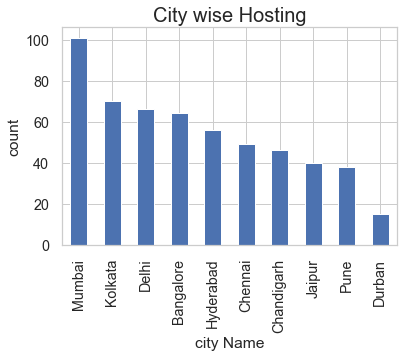

In [29]:
df_matches['city'].value_counts().head(10).plot.bar()
plt.title('City wise Hosting', fontsize = 20)
plt.xlabel('city Name')
plt.ylabel('count')
plt.show()

##### Mumbai city has hosted the most number of IPL matches followed by Kolkata and Delhi in next place

#### Season Wise Matches Played 

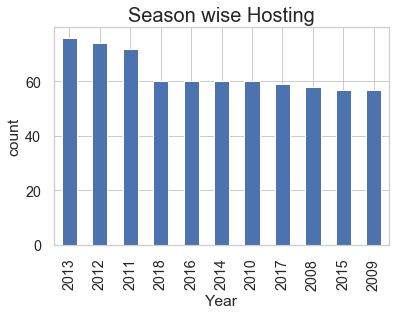

In [30]:
df_matches['season'].value_counts().plot.bar()
plt.title('Season wise Hosting', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('count')
plt.show()

###### Year 2013 has most number of IPL matches followed by 2012 and 2011

#### Most Matches played a Team

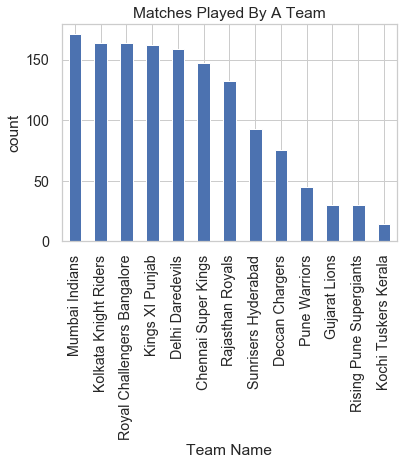

In [31]:
matches_played=pd.concat([df_matches['team1'],df_matches['team2']])
matches_played=matches_played.value_counts().plot.bar()
plt.title('Matches Played By A Team')
plt.xlabel('Team Name')
plt.ylabel('count')
plt.show()

##### Mumbai has played the Most number of IPL matches followed by Koklata Knight Riders and Royal Challengers Bangalore.

#### Most Toss Wins By a team

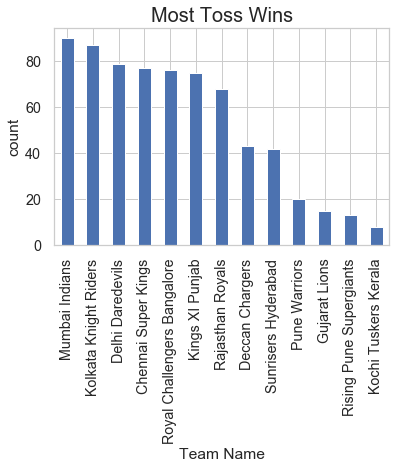

In [32]:
df_matches['toss_winner'].value_counts().plot.bar()
plt.title('Most Toss Wins', fontsize = 20)
plt.xlabel('Team Name')
plt.ylabel('count')
plt.show()

##### Mumbai Indians has won the "Toss" most number of times followed by Kolkata Knight riders and Delhi Daredevils.

#### Toss Decision

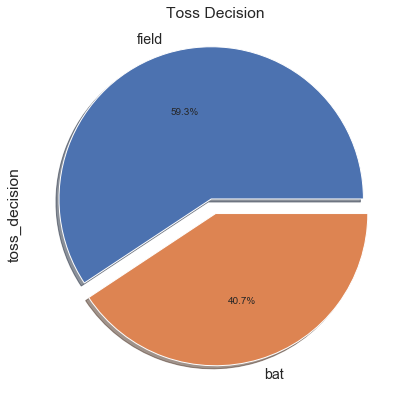

In [33]:
f,ax = plt.subplots(figsize=(22,7))
df_matches['toss_decision'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Toss Decision')
plt.show()

##### Most of the times teams have chosen to Bowl First when they won the Toss. 

#### Team with Most Wins

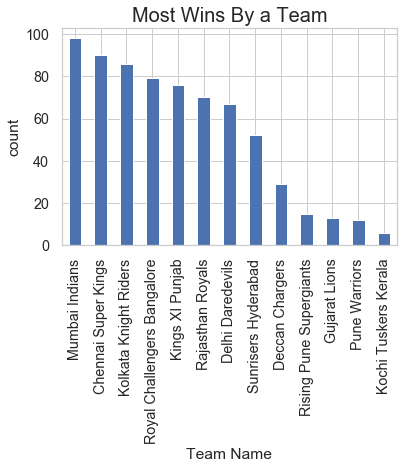

In [34]:
df_matches['winner'].value_counts().plot.bar()
plt.title('Most Wins By a Team', fontsize = 20)
plt.xlabel('Team Name')
plt.ylabel('count')
plt.show()

##### Mumbai Indians has won the highest number of matches in IPL followed by Chennai Super Kings and Kolkata Knight Riders.

#### Wins Percentage by each Team


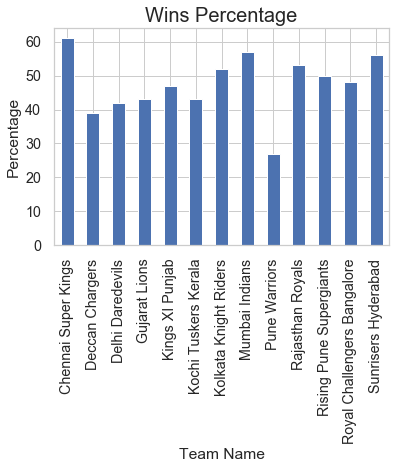

In [35]:
matches_played=pd.concat([df_matches['team1'],df_matches['team2']]).value_counts()
wins=df_matches['winner'].value_counts()
win_percentage = (wins/matches_played)*100
round(win_percentage).plot.bar()
plt.title('Wins Percentage', fontsize = 20)
plt.xlabel('Team Name')
plt.ylabel('Percentage')
plt.show()

#### Even though Mumbai has won highest number of matches, They have played highest number of matches too. But according to Wins percentage , chennai Super Kings is the Most successful Team in IPL followed by Mumbai Indians and Sun Risers Hyderabad

#### Most Hosted Venue

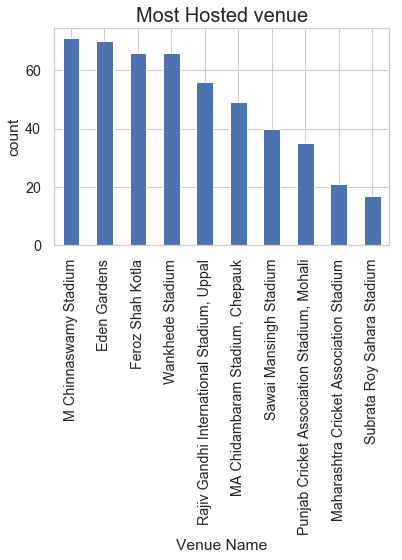

In [36]:
df_matches['venue'].value_counts().head(10).plot.bar()
plt.title('Most Hosted venue',fontsize = 20)
plt.xlabel('Venue Name')
plt.ylabel('count')      
plt.show()

##### M chinnaswamy Stadium has hosted the highest number of matches in IPL followed by Eden gardens and Feroz Shah Kotla.

### Most MOM by a player

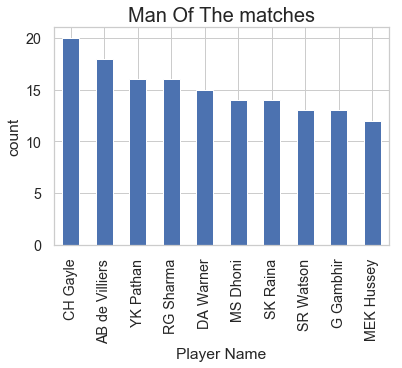

In [37]:
wins=df_matches['player_of_match'].value_counts().head(10).plot.bar()
plt.title('Man Of The matches',fontsize = 20)
plt.xlabel('Player Name')
plt.ylabel('count')      
plt.show()

##### Universal Boss "Chris gayle" tops the list with most MOM's followed by Mister 360 "AB de Villiers" and yusuf K Pathan.Surprisingly No Virat Kohli in Top 10 . Also list has been dominated with batsmen.

#### Most Popular empire

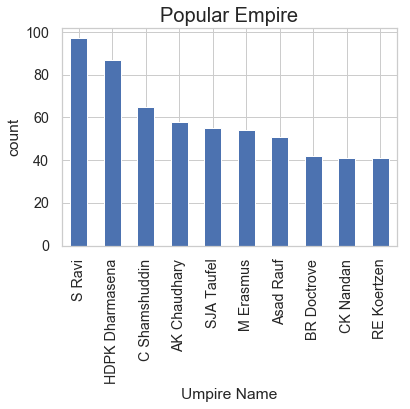

In [38]:
pd.concat([df_matches['umpire1'],df_matches['umpire2']]).value_counts().head(10).plot.bar()
plt.title('Popular Empire',fontsize = 20)
plt.xlabel('Umpire Name')
plt.ylabel('count')      
plt.show()

##### S Ravi is the most Popular empire followed by HDPK Dharmasena and C Shamshuddin

#### Luck of Toss

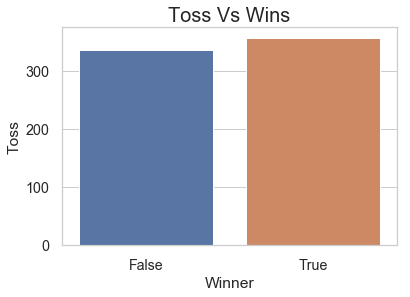

In [56]:
sns.countplot(df_matches['toss_winner'] == df_matches['winner'])
plt.title('Toss Vs Wins',fontsize = 20)
plt.xlabel('Winner')
plt.ylabel('Toss')
plt.show()

##### Team which won the Toss has won the match most of the times but there is not a huge difference observed, So there is a Slight Toss Luck factor worked.

#### Hosting city weather conditions

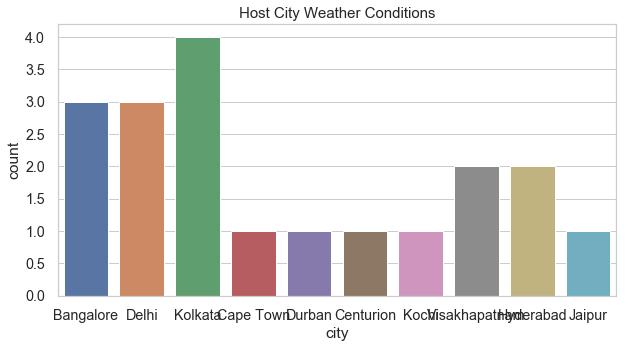

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(df_matches.city[df_matches.dl_applied==1])
plt.title('Host City Weather Conditions',fontsize = 15)
plt.show()

##### Kolkata has effected with bad Weather conditions during IPL matches followed by bangalore and Delhi.

### Lets see if there is any Correlation factor.

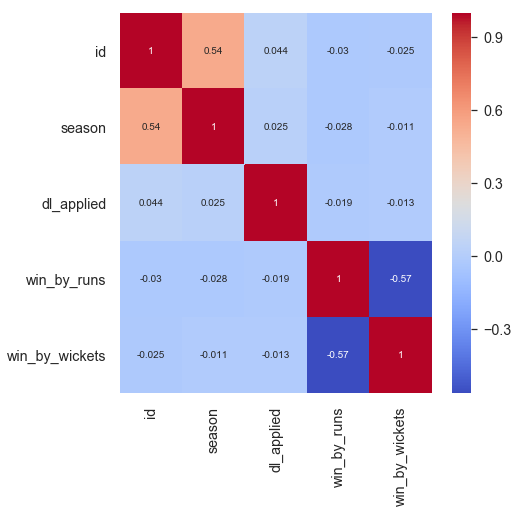

In [48]:
cor=df_matches.corr()

plt.figure(figsize=(7,7))

sns.heatmap(cor,annot=True,cmap='coolwarm')

plt.show()

#### From the above heatmap diagram, there is a negative correlation between the win_by_runs and win_by_wickets , and we know that if one the value is zero then other would be a non-zero value

#### Toss decisions Trend year wise

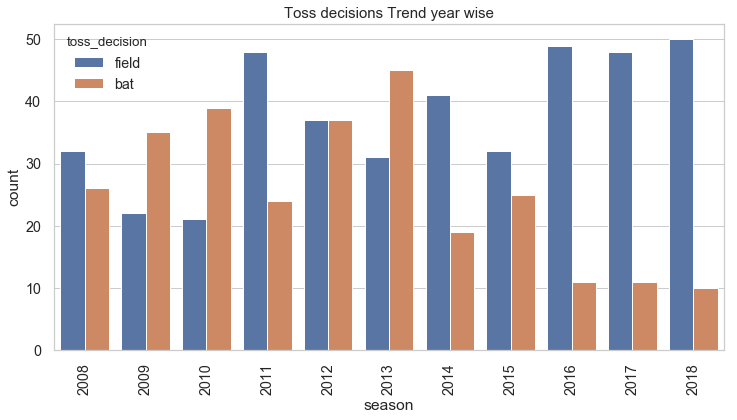

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df_matches)
plt.xticks(rotation='vertical')
plt.title('Toss decisions Trend year wise',fontsize = 15)
plt.show()

##### In initial years of IPL , Teams have choosen to bat First ,but later the trend changed and in recent IPL's teams have mostly choosen to field first if they won First.

#### Most Number of Wins by a Team batting second

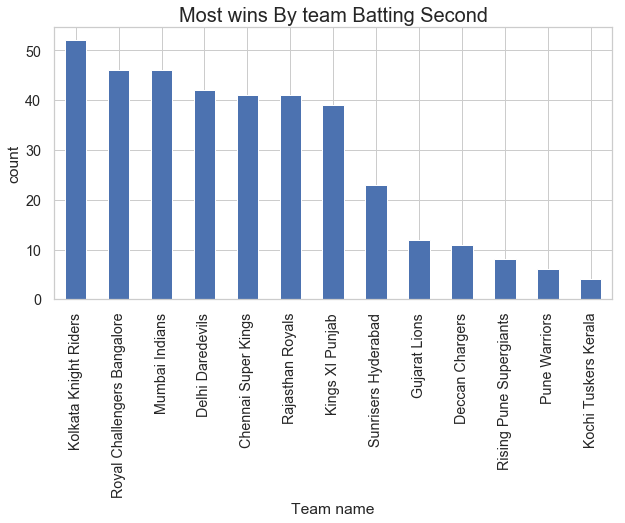

In [61]:
df_matches.winner[df_matches.win_by_wickets!=0].value_counts().plot.bar(figsize=(10,5))
plt.title('Most wins By team Batting Second',fontsize = 20)
plt.xlabel('Team name')
plt.ylabel('count')      
plt.show()

##### Kolkata Knight rider's has won most matches Batting Second followed by Royal Challengers Banglore and Mumbai Indians

#### Most Number of Wins by a Team batting First

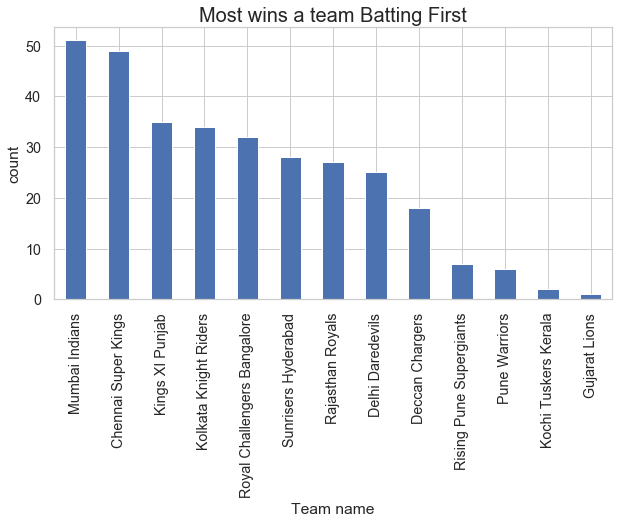

In [59]:
df_matches.winner[df_matches.win_by_runs!=0].value_counts().plot.bar(figsize=(10,5))
plt.title('Most wins a team Batting First',fontsize = 20)
plt.xlabel('Team name')
plt.ylabel('count')      
plt.show()

##### Mumbai Indians has won highest number of matches when batting First followed by Chennai Super Kings and Kings XI Punjab.

#### From the Above analysis and data visulaisation , IT clearly indicates that IPL was mostly dominated by Mumbai Indians ,Chennai Super Kings and Kolkata Knight Riders as they were in one of the first three positions in almost all the aspects.